In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


# **Basic data information**

In [3]:
housing_df = pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# **Data Cleaning**

In [8]:
housing_df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
reduced_housing_df = housing_df.dropna()
reduced_housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
reduced_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
features = housing_df.columns
features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms','households','median_income']
X = reduced_housing_df[features]
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       households  median_income  
0           126.

# **RandomForestRegressor**

In [14]:
y = reduced_housing_df['median_house_value']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

RandomForestRegressor()

In [16]:
val_preds = model.predict(valid_X)
print(val_preds[:5])

[213598.01 153049.   192022.   138914.   157622.  ]


In [17]:
print("Mean absolute Error:",mean_absolute_error(val_preds,valid_y))
print("Mean square Error:", mean_squared_error(val_preds,valid_y))

Mean absolute Error: 32287.044587717148
Mean square Error: 2465589203.165617


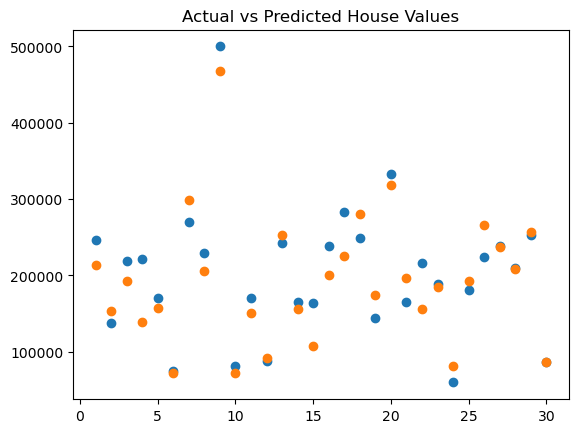

In [18]:
plt.scatter( y = valid_y[:30], x = [i for i in range(1,31)])
plt.scatter(y = val_preds[:30], x = [i for i in range(1,31)])
plt.title("Actual vs Predicted House Values")
plt.show()

# **DecisionTreeRegressor**

In [20]:
model2 = DecisionTreeRegressor()
model2.fit(train_X,train_y)

DecisionTreeRegressor()

In [21]:
preds_val = model.predict(valid_X)

In [22]:
print("Mean absolute Error:",mean_absolute_error(preds_val,valid_y))

Mean absolute Error: 32287.044587717148


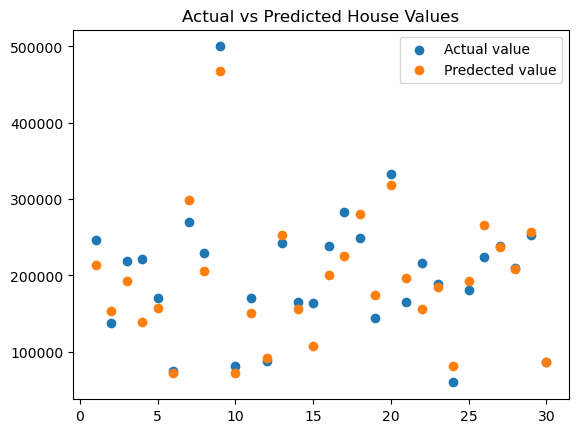

In [23]:
plt.scatter(y = valid_y[:30],x = [i for i in range (1,31)])
plt.scatter(y = preds_val[:30],x = [i for i in range (1,31)])
plt.legend(["Actual value","Predected value"])
plt.title("Actual vs Predicted House Values")
plt.show()

# **LinearRegression**

In [25]:
model3 = LinearRegression()
model3.fit(train_X,train_y)

LinearRegression()

In [26]:
preds_values = model3.predict(valid_X)
mean_squared_error(preds_values, valid_y)

5273120680.287857

In [27]:
print("Mean absolute Error:",mean_absolute_error(preds_values, valid_y))
print("Mean square Error:", mean_squared_error(preds_values, valid_y))

Mean absolute Error: 53309.96623379568
Mean square Error: 5273120680.287857


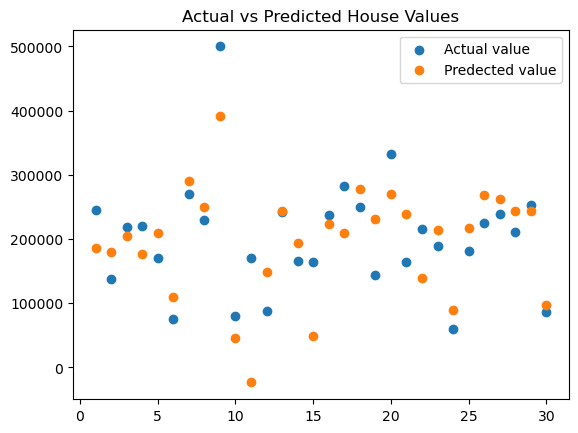

In [82]:
plt.scatter(y = valid_y[:30],x = [i for i in range(1,31)])
plt.scatter(y = preds_values[:30], x = [i for i in range(1 , 31)])
plt.legend(["Actual value","Predected value"])
plt.title("Actual vs Predicted House Values")
plt.show()

# **Data Visulization**

## 1)  Box Plots of Predictions for Random Forest

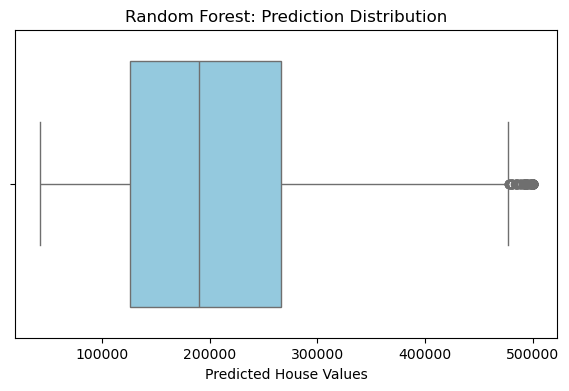

In [31]:
plt.figure(figsize=(7,4))
sns.boxplot(x=val_preds, color='skyblue')
plt.title("Random Forest: Prediction Distribution")
plt.xlabel("Predicted House Values")
plt.show()

## Residual Histogram for Random Forest.

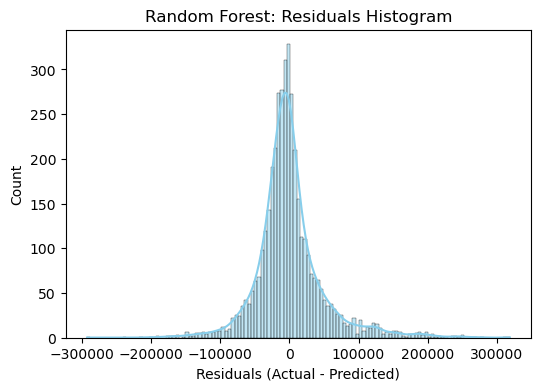

In [33]:
rf_residuals = valid_y - val_preds
plt.figure(figsize=(6,4))
sns.histplot(rf_residuals, kde=True, color='skyblue')
plt.title("Random Forest: Residuals Histogram")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

## Predicted Value Distribution for Random Forest.

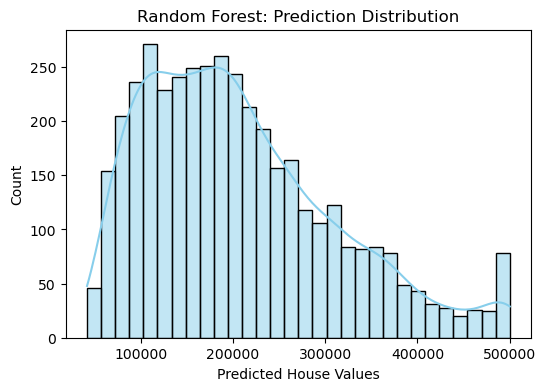

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(val_preds, bins=30, kde=True, color='skyblue')
plt.title("Random Forest: Prediction Distribution")
plt.xlabel("Predicted House Values")
plt.show()

## Box Plot of Prediction for Decision Tree.

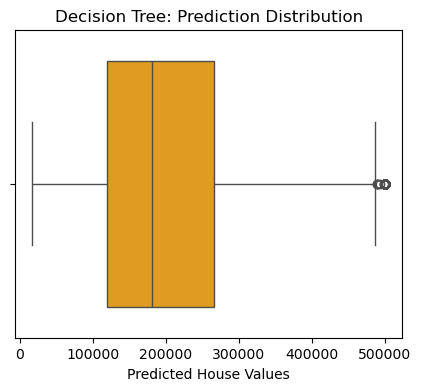

In [37]:
preds_val_tree = model2.predict(valid_X)
plt.figure(figsize=(5,4))
sns.boxplot(x=preds_val_tree, color='orange')
plt.title("Decision Tree: Prediction Distribution")
plt.xlabel("Predicted House Values")
plt.show()

## Residual Histogram for Decision Tree.

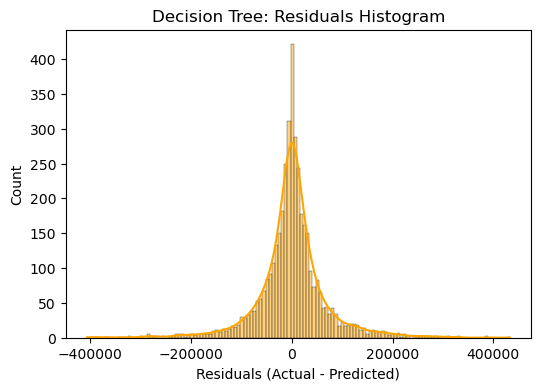

In [39]:
tree_residuals = valid_y - preds_val_tree
plt.figure(figsize=(6,4))
sns.histplot(tree_residuals, kde=True, color='orange')
plt.title("Decision Tree: Residuals Histogram")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

## Predicted Value Distribution for Decision Tree.

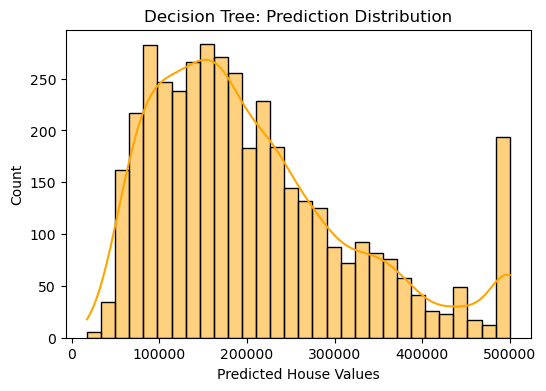

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(preds_val_tree, bins=30, kde=True, color='orange')
plt.title("Decision Tree: Prediction Distribution")
plt.xlabel("Predicted House Values")
plt.show()

## Box Plot of Distribution for Linear Regression.

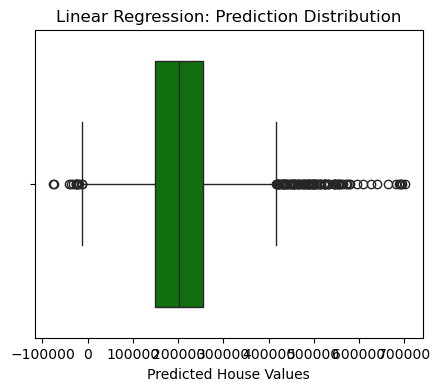

In [43]:
plt.figure(figsize=(5,4))
sns.boxplot(x=preds_values, color='green')
plt.title("Linear Regression: Prediction Distribution")
plt.xlabel("Predicted House Values")
plt.show()

## Residual Histogram for Linear Regression.

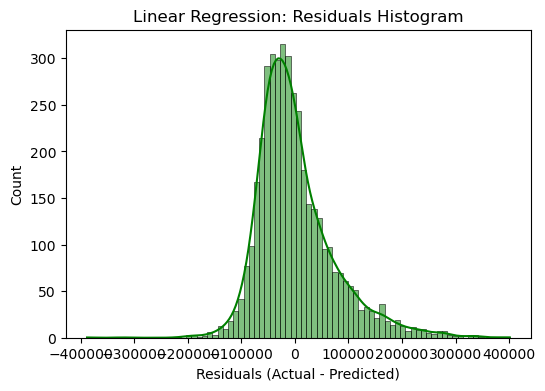

In [45]:
lr_residuals = valid_y - preds_values
plt.figure(figsize=(6,4))
sns.histplot(lr_residuals, kde=True, color='green')
plt.title("Linear Regression: Residuals Histogram")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

## Predicted Value Distribution of Linear Regression.

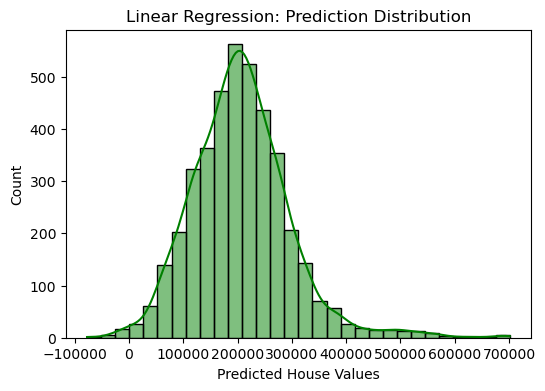

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(preds_values, bins=30, kde=True, color='green')
plt.title("Linear Regression: Prediction Distribution")
plt.xlabel("Predicted House Values")
plt.show()